In [24]:
import os

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import dotenv

from tiled.client import from_uri


dotenv.load_dotenv()

client = from_uri("http://localhost:8000/api", api_key=os.getenv("TILED_SINGLE_USER_API_KEY"))
if client.get("runs") is None:
    client.create_container("runs")

In [54]:
data = client['runs'].values()[-1]['shot_sum'][99 ]
data[0]


array([0., 0., 0., ..., 0., 0., 0.])

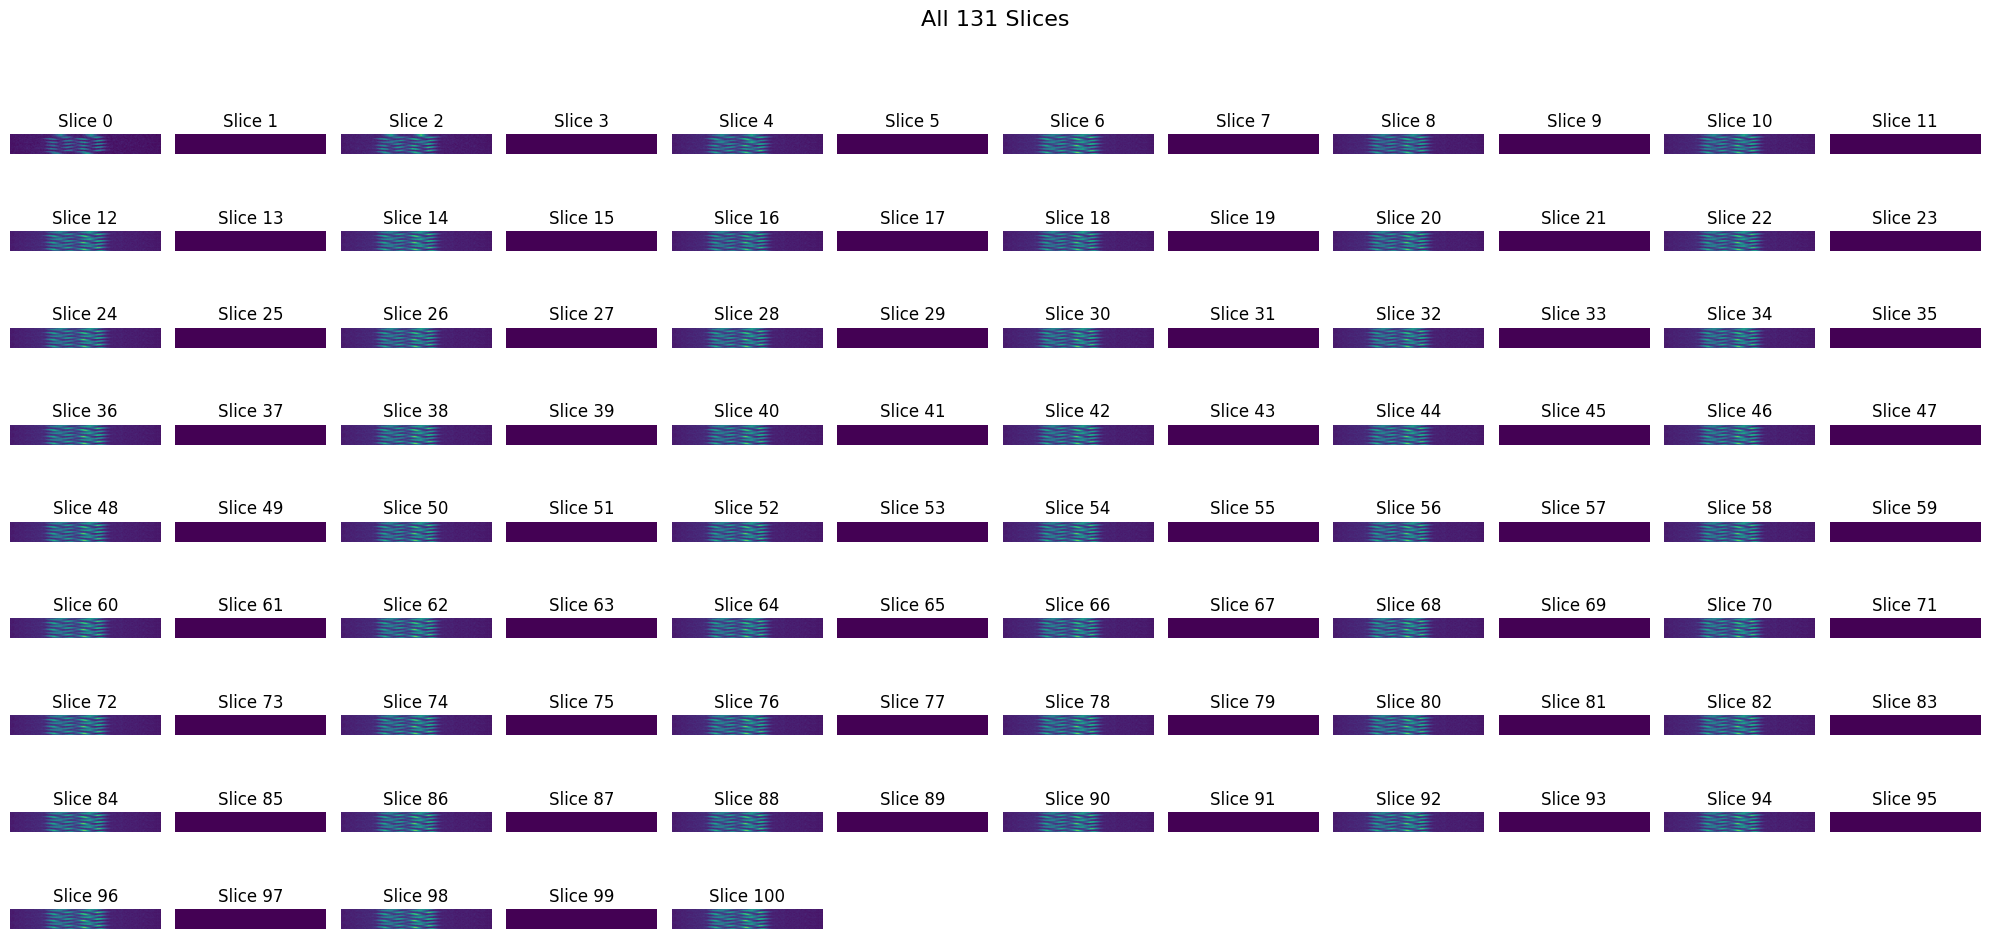

In [44]:
# Plot setup
n_slices = data.shape[0]  # Number of slices
n_cols = 12  # Number of columns
n_rows = -(-n_slices // n_cols)  # Compute rows, ensure all slices fit (ceil division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
fig.suptitle("All 131 Slices", fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each slice and display it
for i in range(n_slices):
    ax = axes[i]
    ax.imshow(data[i, :, :], cmap="viridis")
    ax.set_title(f"Slice {i}")
    ax.axis("off")  # Hide axes for clarity

# Hide unused subplots (if any)
for j in range(n_slices, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for the title
plt.show()

In [42]:
data[17].max()


np.float64(0.0)